In [1]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent.parent))

In [2]:
%load_ext autoreload
%autoreload 2
import os
import gymnasium as gym
from typing import List
from gymnasium.core import ActType
import matplotlib.pyplot as plt
from IPython.display import Video

import specless as sl
from specless.minigrid.tspenv import TSPEnv  # NOQA

LOG_DIR = Path.cwd().joinpath(".log")
print(str(LOG_DIR))

# print(gym.pprint_registry())

/Users/kandai/Documents/projects/dev/specless/examples/demo/.log


/usr/local/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.actions to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.actions` for environment variables or `env.get_wrapper_attr('actions')` that will search the reminding wrappers.
  logger.warn(


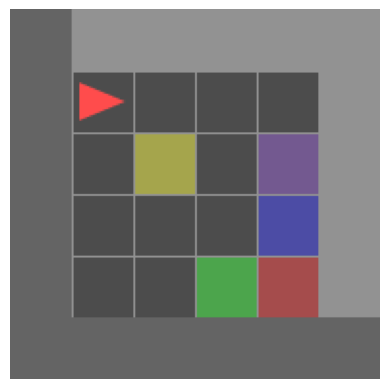

In [6]:
env = gym.make("MiniGrid-TSP-v0", render_mode="rgb_array", seed=3)
env = sl.MiniGridTransitionSystemWrapper(
    env, ignore_direction=True, skip_observations=["unseen", "wall"]
)
env.reset()
plt.imshow(env.render())
plt.axis("off")
plt.show()

In [7]:
from specless.automaton.pdfa import PDFA

pdfabuilder = sl.PDFABuilder()
pdfa: PDFA = pdfabuilder(os.path.join(os.getcwd(), "pdfa.yaml"))

In [10]:
synthesizer = sl.ProductGraphSynthesisAlgorithm()
strategy = synthesizer.synthesize(env, pdfa)

/usr/local/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.actions to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.actions` for environment variables or `env.get_wrapper_attr('actions')` that will search the reminding wrappers.
  logger.warn(


  0%|          | 0/36 [00:00<?, ?it/s]

0.04s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


In [13]:
strategy.plan

['south', 'east', 'south', 'south', 'east', 'east']